In [1]:
from sklearn.datasets import make_regression
import numpy as np

C:\Users\wellcome\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
x, y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1, noise=80, random_state=13)

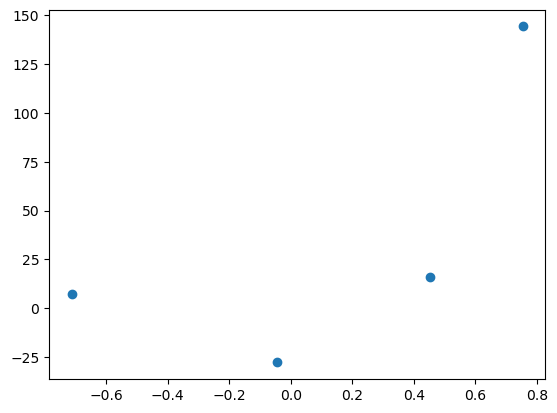

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [6]:
reg.coef_

array([78.35063668])

In [7]:
reg.intercept_

26.15963284313262

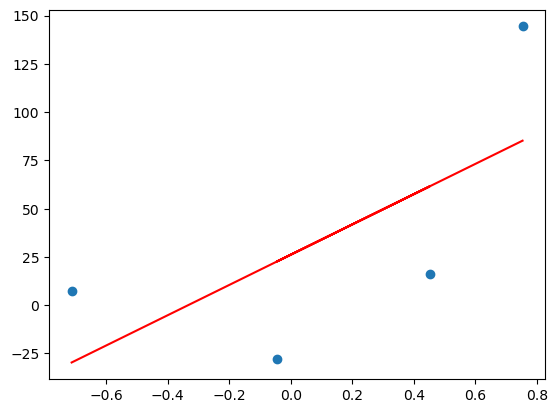

In [8]:
plt.scatter(x,y)
plt.plot(x, reg.predict(x), color='red')

In [9]:
#Let's apply gradient descent assuming slope is contant m=78.35
#and let's assume stating value of intercept of  b=0
y_pred = ((78.35 * x) + 0).reshape(4)
y_pred.shape

(4,)

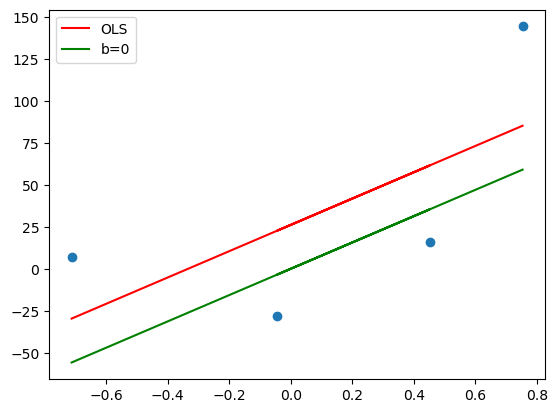

In [10]:
plt.scatter(x,y)
plt.plot(x, reg.predict(x), color='red', label='OLS')
plt.plot(x, y_pred, color='green', label='b=0')
plt.legend()
plt.show()

In [11]:
m=78.35
b=0

In [12]:
loss_slope = -2 * np.sum(y - m*x.ravel() - b)
loss_slope

-209.27763408209216

In [13]:
#Let's take learning rate = 0.1

lr=0.1
step_size = lr*loss_slope
step_size

-20.927763408209216

In [14]:
#Calculate the new intercept
b = b - step_size
b

20.927763408209216

In [15]:
y_pred1 = ((m * x) + b).reshape(4)

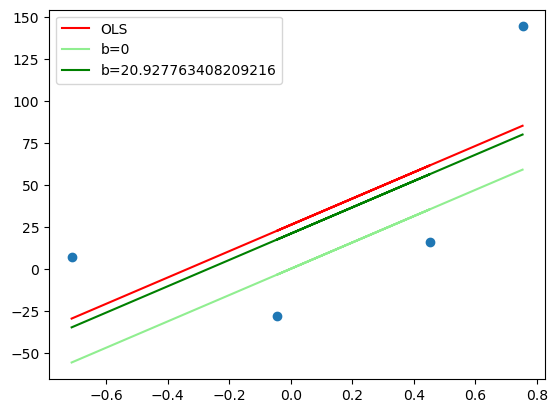

In [16]:
plt.scatter(x,y)
plt.plot(x, reg.predict(x), color='red', label='OLS')
plt.plot(x, y_pred, color='lightgreen', label='b=0')
plt.plot(x, y_pred1, color='green', label='b={}'.format(b))
plt.legend()
plt.show()

In [17]:
#ITERATION 2
loss_slope = -2 * np.sum(y - m*x.ravel() - b)
loss_slope

-41.85552681641843

In [18]:
step_size = loss_slope*lr
step_size

-4.185552681641844

In [19]:
b = b- step_size
b

25.11331608985106

In [20]:
y_pred2 = ((m * x) + b).reshape(4)

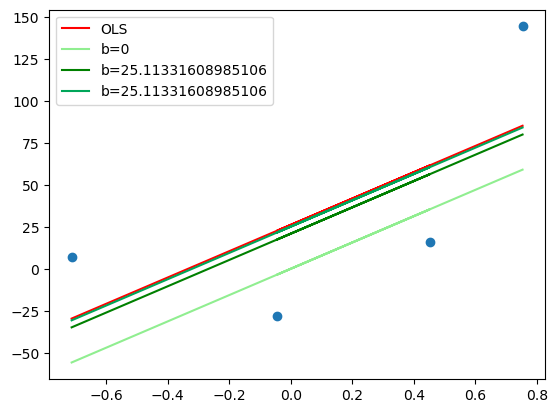

In [21]:
plt.scatter(x,y)
plt.plot(x, reg.predict(x), color='red', label='OLS')
plt.plot(x, y_pred, color='lightgreen', label='b=0')
plt.plot(x, y_pred1, color='green', label='b={}'.format(b))
plt.plot(x, y_pred2, color='#00a65a', label='b={}'.format(b))
plt.legend()
plt.show()

In [22]:
#ITERATION 2
loss_slope = -2 * np.sum(y - m*x.ravel() - b)
loss_slope

-8.371105363283675

In [23]:
step_size = loss_slope*lr
step_size

-0.8371105363283675

In [24]:
b = b- step_size
b

25.95042662617943

In [25]:
y_pred3 = ((m * x) + b).reshape(4)

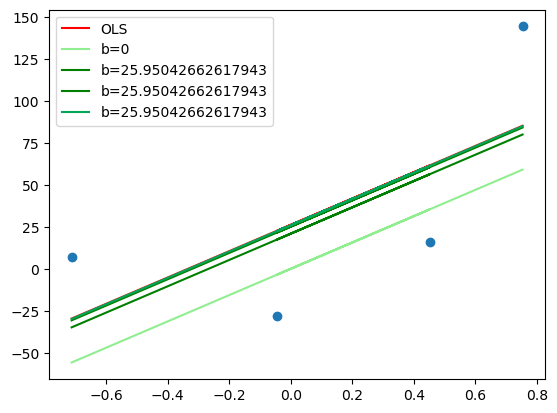

In [26]:
plt.scatter(x,y)
plt.plot(x, reg.predict(x), color='red', label='OLS')
plt.plot(x, y_pred, color='lightgreen', label='b=0')
plt.plot(x, y_pred1, color='green', label='b={}'.format(b))
plt.plot(x, y_pred2, color='green', label='b={}'.format(b))
plt.plot(x, y_pred3, color='#00a65a', label='b={}'.format(b))
plt.legend()
plt.show()

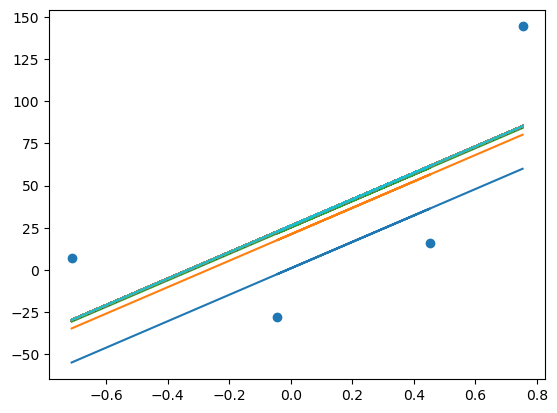

In [27]:
b=-100
m=78.35
lr = 0.1

epochs=100

for i in range(epochs):
    loss_slope = -2 * np.sum(y - m*x.ravel() - b)
    
    b = b - loss_slope*lr
    
    y_pred = ((m * x) + b).reshape(4)
    
    plt.plot(x, y_pred)
    
plt.scatter(x,y)

# Gradient Descent Code

In [28]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [29]:
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20)

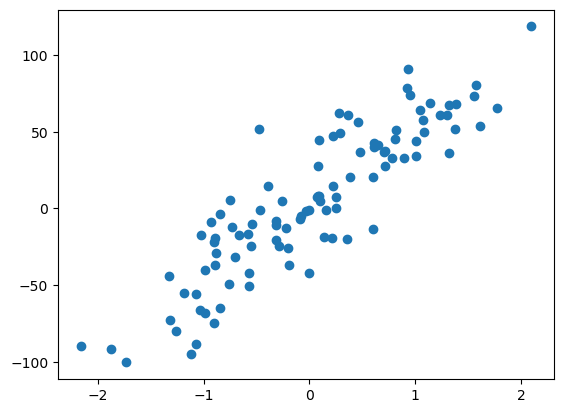

In [32]:
plt.scatter(x,y)

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lr = LinearRegression()

In [36]:
lr.fit(x_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[48.73122382]
2.523095810546912


In [37]:
y_pred = lr.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5646532217756103

In [42]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)
        
    def predict(self,X):
        return self.m * X + self.b

In [43]:
gd = GDRegressor(0.001, 100)

In [44]:
gd.fit(x_train,y_train)

48.731261764702815 2.5230894881076456


In [45]:
y_pred = gd.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5646531073724159